In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer # tach thanh ma tran dem thua thot

In [3]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
source = data['v2']
type(source)

pandas.core.series.Series

In [7]:
#so luong ham va spam
data.groupby('v1').v2.count()

v1
ham     4825
spam     747
Name: v2, dtype: int64

In [10]:
target = data['v1']

In [11]:
#ham = 0, spam = 1

In [12]:
target = target.replace("ham", 0)
target = target.replace("spam", 1)
target.head()

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

In [13]:
temp = pd.DataFrame(target)

In [14]:
text_data = np.array(source)
text_data[:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

In [17]:
#tao ma tran dem thua thot
count = CountVectorizer()
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [18]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X.shape

(5572, 8672)

In [21]:
y = np.array(target)
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
y.shape

(5572,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [24]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_predict = clf.predict(X_test)

In [27]:
print("Score training: ", clf.score(X_train, y_train))

Score training:  0.9934933811981154


In [28]:
print("Score testting: ", clf.score(X_test, y_test))

Score testting:  0.9802690582959641


In [29]:
# Training va testting deu co score cao, khong chenh lech qua nhieu -> model khong bi over hoac underfitting

In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy is: ", accuracy_score(y_test, y_predict) * 100, "%")

Accuracy is:  98.02690582959642 %


In [35]:
#danh gia model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       0.93      0.91      0.92       140

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [37]:
#nhan xet: co precision va recall cao

In [40]:
y_proba = clf.predict_proba(X_test)
y_proba

array([[1.00000000e+00, 5.20245323e-26],
       [7.29014627e-10, 9.99999999e-01],
       [9.99990947e-01, 9.05271029e-06],
       ...,
       [9.99999996e-01, 4.49773290e-09],
       [6.78111282e-01, 3.21888718e-01],
       [9.99999186e-01, 8.14016338e-07]])

In [41]:
roc_auc_score(y_test, y_proba[:,1])

0.9858315018315019

In [43]:
import matplotlib.pyplot as plt

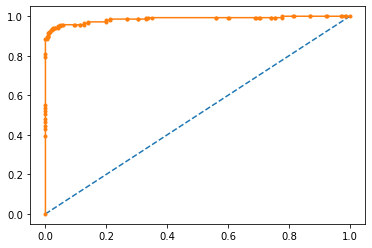

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [45]:
#ROC cao
#Dua tren tat ca danh gia => model phu hop


In [47]:
import pickle
#Save to file in the current working directory
plk_filename = "ham_spam_model.plk"
with open(plk_filename , 'wb') as file:
    pickle.dump(clf, file)

In [48]:
with open(plk_filename, "rb") as file:
    pickle_model = pickle.load(file)

In [51]:
X_new = np.array(['Dear ms. Phuong. I will come on time', 
                  'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%'])
X_new = count.transform(X_new)
y_new = pickle_model.predict(X_new)
y_new

array([0, 1], dtype=int64)